## Ex. 1-1)  Visualize the color channels
Each pixel has intensity values for red, green and blue channels. Please make these 3-channel values visible, and also show intensity (gray-scale) image.

| Red  | Green | Blue | Intensity | 
| ---- | ---- | ---- | ---- | 
| <img src="fig/tri_r.png"> | <img src="fig/tri_g.png"> | <img src="fig/tri_b.png"> | <img src="fig/tri_sum.png"> |


The intensity image produced in the example code is different from the greyscale image obtained by the following code. 
```
test = Image.open(in_img_path).convert('LA')
test.save('grey.png')
```
so think about how the above function obitan the grey-scale image. Have a look at https://github.com/python-pillow/Pillow for reference.

### Type your code below.

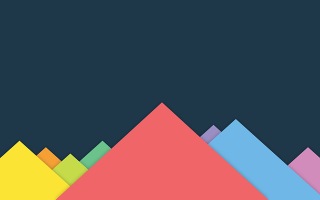

(200, 320, 3)
uint8


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

triangle_path = "in/triangle.png"
img = Image.open(triangle_path)

img.show()
img_arr = np.asarray(img)
print(img_arr.shape)
print(img_arr.dtype)

In [2]:
channels = ("red", "green", "blue")
side_by_sides = [] # Will use later for side by side plotting

for i, c in enumerate(channels):
    channel_img = np.zeros(img_arr.shape, dtype=np.uint8)
    channel_img[:,:,i] = img_arr[:,:,i]
    side_by_sides.append(channel_img)
    channel_img = Image.fromarray(channel_img)
#     channel_img.show()
    if not os.path.isdir('./ex1-1-result/'):
        os.mkdir('./ex1-1-result/')
    channel_img.save(f"./ex1-1-result/color_{c}.png")
    
gray_arr = (np.sum(img_arr, axis = 2)/3).astype(np.uint8)
print(gray_arr.shape)
side_by_sides.append(gray_arr)
gray_img = Image.fromarray(gray_arr)
# gray_img.show()
gray_img.save(f"./ex1-1-result/gray.png")

(200, 320)


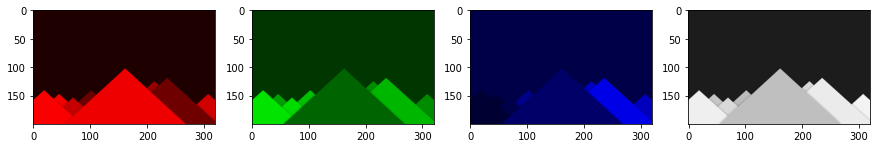

In [3]:
fig, axs = plt.subplots(1, 4, figsize=(15,15))

for i,v in enumerate(side_by_sides):
    if i != 3:
        axs[i].imshow(v, cmap = "viridis")
    else:
        axs[i].imshow(v, cmap = "gray")

plt.show(block=True)

Example code:

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

in_img_path = "in/triangle.png"
img = Image.open(in_img_path)
pix = np.asarray(img)

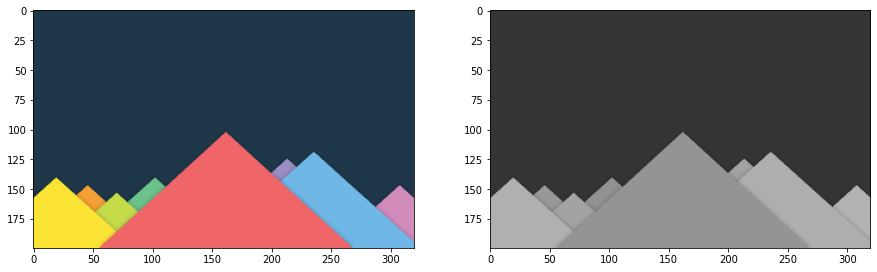

In [5]:
# Make color channel images
chan = {
  0: 'r',
  1: 'g',
  2: 'b'
}

for i in [0,1,2]:
    channel_visualize = pix.copy()
    channel_visualize.fill(0)
    channel_visualize[:,:,i] = pix[:,:,i] 
    channel_visualize = Image.fromarray(channel_visualize)
    channel_visualize.save("color_"+chan[i]+".png")
    #imgplot = plt.imshow(channel_visualize)

# Make intensity image
red = np.float32(pix[:,:,0])
green = np.float32(pix[:,:,1])
blue = np.float32(pix[:,:,2])
gray = np.zeros(pix.shape,dtype=np.float32)

for i in range(0,3):    
    gray[:,:,i] = (red + green + blue)/3

grays = Image.fromarray(np.uint8(gray))
grays.save("sum.png")


# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img)

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(grays)

plt.show(block=True)